In [5]:
#Black-Scholes Option

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
def black_scholes_price(S, K, T, r, sigma, option_type = 'call'):
    "Calculate the Black-Scholes price for a European call or put option."
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put' ")
    return price, d1, d2


In [8]:
S = 100
K = 105
T = 0.5
r = 0.05
sigma = 0.2

call_price, d1, d2 = black_scholes_price(S, K, T, r, sigma, 'call')
put_price, _, _ = black_scholes_price(S, K, T, r, sigma, 'put')

print(f"Call Price: ${call_price: .2f}")
print(f"Put Price: ${put_price: .2f}")
print(f"d1 = {d1:.4f}, d2 = {d2: .4f}")

Call Price: $ 4.58
Put Price: $ 6.99
d1 = -0.0975, d2 = -0.2389


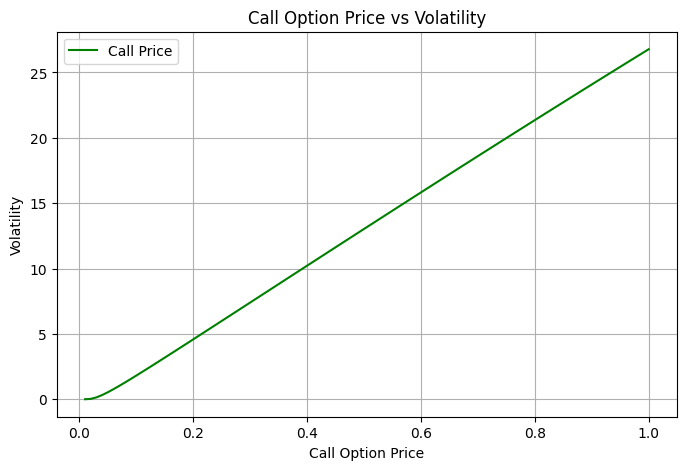

In [9]:
vols = np.linspace(0.01, 1.0, 100)
call_prices = [black_scholes_price(S, K, T, r, v, 'call')[0] for v in vols]

plt.figure(figsize = (8,5))
plt.plot(vols, call_prices, label = 'Call Price', color = 'green')
plt.title('Call Option Price vs Volatility')
plt.xlabel('Call Option Price')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()